# Valence Scoring Assignment


## Valence scoring:
* Modify the valence function:
    * Remove punctuation (“hate.” should match our dictionary)
    * Adjust for whether the previous word is one of these negators: not, never, no, none, nobody, nothing, don’t, doesn’t, won’t, shan’t, didn’t, shouldn’t, wouldn’t, couldn’t, can’t, cannot, neither, nor

In [1]:
# load valence lists

poswords = []
with open("poswords.txt") as f:
    for word in f:
        word = word.strip()
        poswords.append(word)
print(len(poswords),'positive words loaded:', poswords[0:5], '\n')

negwords = []
with open("negwords.txt") as f:
    for word in f:
        word = word.strip()
        negwords.append(word)
print(len(negwords), 'negative words loaded:', negwords[0:5])

2006 positive words loaded: ['a+', 'abound', 'abounds', 'abundance', 'abundant'] 

4783 negative words loaded: ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


In [2]:
# load negate words

negate = []
with open("negate.txt") as f:
    for word in f:
        word = word.strip()
        negate.append(word)
print(len(negate),'negating words loaded:', negate[0:5], '\n')

17 negating words loaded: ['not', 'never', 'no', 'none', 'nobody'] 



In [5]:
# testing the peice of code to remove punctuation 

import re 
s = "string. With. Punctuation?" 
s = re.sub(r'[^\w\s]','',s)
print(s)

string With Punctuation


### OLD Valence Function

In [63]:
#create valence function

def valence_old(text):
    text = str(text)
    #put text into lower-case
    text = text.lower().strip()
    #split text into words
    words = text.split()
    #count how many words from the text are in the positive and negative lists
    posct, negct = 0, 0
    for i, word in enumerate(words):
        if word in poswords:
            posct += 1
            #print('pos:', word)
        elif word in negwords:
            negct += 1
            #print('neg:', word)
    #print(posct, negct)
    #create a summary measure of the text's valence
    result = (posct - negct) / len(words)
    return result

### NEW Valence Function

In [72]:
#Create valence function
import re 
def valence(text):
    text = str(text)
    #remove punctuation from a string
    text = re.sub(r'[^\w\s]','',text)
    #put text into lower-case
    text = text.lower().strip()
    #split text into words
    words = text.split()
    #count how many words from the text are in the positive and negative lists
    posct, negct = 0, 0
    for i, word in enumerate(words):
        if word in poswords:
            if (i - 1 >= 0) and words[i-1] not in negate and words[i-2] not in negate:
                posct += 1
                #print('pos:', word)
            else:
                negct += 1
                '''if (i - 1 >= 0) and words[i-1] in negate:
                    print('negate:', words[i-1])
                else:
                    print('negate:', words[i-2])
                print('pos:', word)'''
        elif word in negwords:
            if (i - 1 >= 0) and words[i-1] not in negate and words[i-2] not in negate:
                negct += 1
                #print('neg:', word)
            else:
                posct += 1
                '''if (i - 1 >= 0) and words[i-1] in negate:
                    print('negate:', words[i-1])
                else:
                    print('negate:', words[i-2])
                print('neg:', word)'''
    #print(posct, negct)
    #create a summary measure of the text's valence
    result = (posct - negct) / len(words)
    return result

In [58]:
# test the Valence function
s = 'I am bad'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")

s = 'I am good.'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")



neg: bad
0 1
I am bad 
 old Valence = -0.3333333333333333
neg: bad
I am bad 
 new Valence = -0.3333333333333333


0 0
I am good. 
 old Valence = 0.0
pos: good
I am good. 
 new Valence = 0.3333333333333333




In [56]:
# test the Valence function
s = 'I am not bad'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")

s = 'I am not good'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")



neg: bad
0 1
I am not bad 
 old Valence = -0.25
negate: not
neg: bad
I am not bad 
 new Valence = 0.25


pos: good
1 0
I am not good 
 old Valence = 0.25
negate: not
pos: good
I am not good 
 new Valence = -0.25




In [57]:
# test the Valence function
s = 'I am terribly bad'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")

s = 'I am terribly good'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")

s = 'This is not a good idea.'
print(s, "\n old Valence =",valence_old(s))
print(s, "\n new Valence =",valence(s))
print("\n")

neg: terribly
neg: bad
0 2
I am terribly bad 
 old Valence = -0.5
neg: terribly
neg: bad
I am terribly bad 
 new Valence = -0.5


neg: terribly
pos: good
1 1
I am terribly good 
 old Valence = 0.0
neg: terribly
pos: good
I am terribly good 
 new Valence = 0.0


pos: good
1 0
This is not a good idea. 
 old Valence = 0.16666666666666666
negate: not
pos: good
This is not a good idea. 
 new Valence = -0.16666666666666666




##### Apply the function to your corpus
    * Can use the beer reviews data again
    * Or any textual data you have collected for your final project

In [82]:
#load in text to analyze
import pandas as pd

df = pd.read_csv('Reviews/beer_reviews.txt', sep = '\t')
print(df.shape)
df.head()

(250, 3)


,style,overall,review
0,Hefeweizen,1.5,A lot of foam. But a lot. In the smell some ba...
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ..."
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compac..."
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit..."
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca..."


In [83]:
s = df.loc[0, 'review']
print(s)
print("\nOld Valence:",valence_old(s))
print("\nNew Valence:",valence(s))

A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.

Old Valence: 0.0

New Valence: -0.04081632653061224


**<font color=blue>From the previous valence function, the score was 0.</font>**
**<font color=blue>The valence function makes more sense as it is in sync with the rating of 1.5.**</font>

### Applying the OLD valence function to all reviews

In [85]:
# apply function to all reviews
import time
start = time.time()

df['score'] = df['review'].apply(valence_old)

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')

df.head()


computation took 0.03242153326670329 minutes


,style,overall,review,score
0,Hefeweizen,1.5,A lot of foam. But a lot. In the smell some ba...,0.000000
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ...",-0.049180
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compac...",0.000000
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit...",0.121622
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca...",0.014925


### Applying the NEW valence function to all reviews

In [86]:
# apply function to all reviews
import time
start = time.time()

df['score'] = df['review'].apply(valence)

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')

df.head()


computation took 0.03189533551534017 minutes


,style,overall,review,score
0,Hefeweizen,1.5,A lot of foam. But a lot. In the smell some ba...,-0.040816
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ...",0.000000
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compac...",0.014493
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit...",0.135135
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca...",0.024876


count    250.000000
mean       0.046684
std        0.040502
min       -0.056604
25%        0.019201
50%        0.044152
75%        0.070073
max        0.189189
Name: score, dtype: float64

correlation w/ rating: 0.275


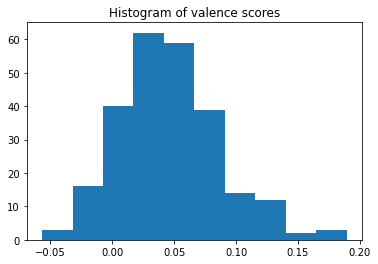

In [45]:
# examine the results
from matplotlib import pyplot as plt

print(df.score.describe())
print('\ncorrelation w/ rating:', df.score.corr(df.overall).round(3))
plt.hist(df.score)
plt.title('Histogram of valence scores')
plt.show()

### Analyze the results
*  __Is there lift in the association b/w valence and overall rating (or any other metrics you have)__
    - Yes, there is a lift in the association b/w valence and overall rating. The correlation previously was <font color=blue>__0.211__</font> and now it is <font color=blue>__0.275.__</font>
* __Examine the top/bottom records. Do the valence scores make sense?__
    - To some extent, the valence score makes sense, but it needs to be improved further.
    - For example:
    - When someone uses an oxymoron term like <font color=blue>"terribly good"</font> the valence must have some positive score. Here in the above function, it gives zero canceling positive and negative words. However, the sentiment was positive.
* __How else could you improve the function?__
   - Certain times, words from other languages are used in a review, like an exclamatory word to describe a feeling. These can be included in our dictionary.
   - Also like I mentioned above, when there are oxymorons like below, they need to identified per the sentiment and not cancelled out:
       - <font color=blue>Amazingly awful</font>
       - <font color=blue>Sweet sorrow</font>
       - <font color=blue>Dark light</font>
       - <font color=blue>Growing smaller</font>
       - <font color=blue>quite incredible</font>

* __Bonus: find the most frequent words that are not in the valence dictionaries. Do any of these seem meaningful/important?__
    - Again, oxymoron words like 'bittersweet' are missing from the dictionary.   
    - One thing to note is that no matter how much we try to translate sentiments into machine learnable format, it is not always meaningful.  For example, sometimes the same word can be used to describe a good and a bad feeling, like some of the slang words, even though they have a negative connotation to them, are used to show a positive feeling. 